Importing Libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import keras
from keras import layers
import os
import datetime
import tensorflow as tf
from keras import regularizers

Preprocessing and loading data

In [2]:
# Load and preprocess CIFAR-100 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
num_classes = len(np.unique(y_train))

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

169001437/169001437 [==============================] - 4s 0us/step


VGG16 Model Architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

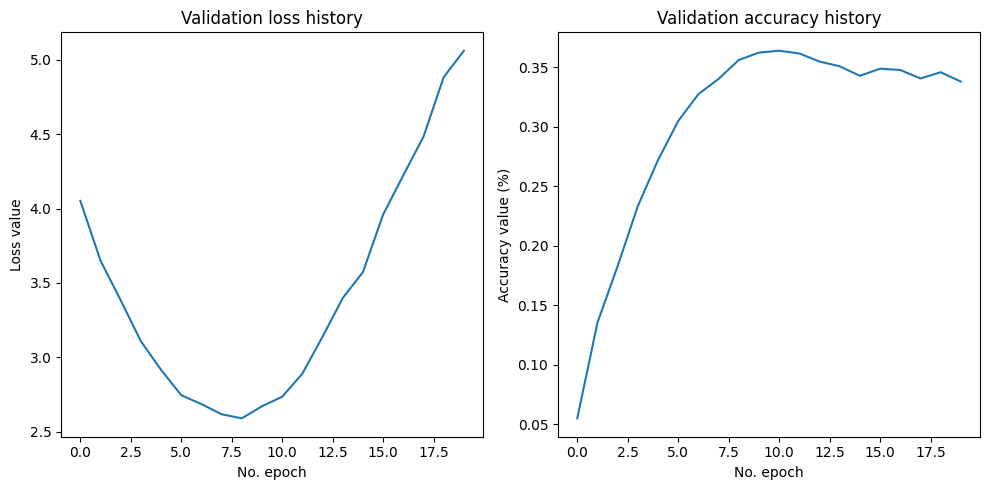

In [3]:
model = keras.Sequential(
    [
        # Block 1
        layers.Conv2D(32, (3,3), activation='relu', padding='same',  input_shape=x_train.shape[1:]),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

        # Block 2
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

        # Block 3
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

        # Block 4
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(2048, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax'),
    ]
)
model.summary()

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights = True)
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

# Plotting validation and loss curves
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')

plt.tight_layout()
plt.show()

VGG16 model with regularizers

In [4]:
model = keras.Sequential(
    [
        # Block 1
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=x_train.shape[1:]),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.4),

        # Block 2
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.4),

        # Block 3
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.5),

        # Block 4
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.5),

        # Fully connected layers
        layers.Flatten(),
        layers.Dense(2048, activation='relu'),
         layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax'),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

Epoch 1/100
391/391 [==============================] - 21s 32ms/step - loss: 16.9102 - accuracy: 0.0486 - val_loss: 9.2905 - val_accuracy: 0.0182
Epoch 2/100
391/391 [==============================] - 11s 28ms/step - loss: 7.9097 - accuracy: 0.0924 - val_loss: 7.8599 - val_accuracy: 0.0696
Epoch 3/100
391/391 [==============================] - 11s 29ms/step - loss: 7.1880 - accuracy: 0.1292 - val_loss: 7.8441 - val_accuracy: 0.1175
Epoch 4/100
391/391 [==============================] - 12s 30ms/step - loss: 6.7651 - accuracy: 0.1712 - val_loss: 6.5091 - val_accuracy: 0.1731
Epoch 5/100
391/391 [==============================] - 11s 28ms/step - loss: 6.5012 - accuracy: 0.2026 - val_loss: 6.4776 - val_accuracy: 0.2331
Epoch 6/100
391/391 [==============================] - 11s 28ms/step - loss: 6.3322 - accuracy: 0.2302 - val_loss: 6.7778 - val_accuracy: 0.2160
Epoch 7/100
391/391 [==============================] - 11s 27ms/step - loss: 5.9928 - accuracy: 0.2561 - val_loss: 5.5947 - val_a

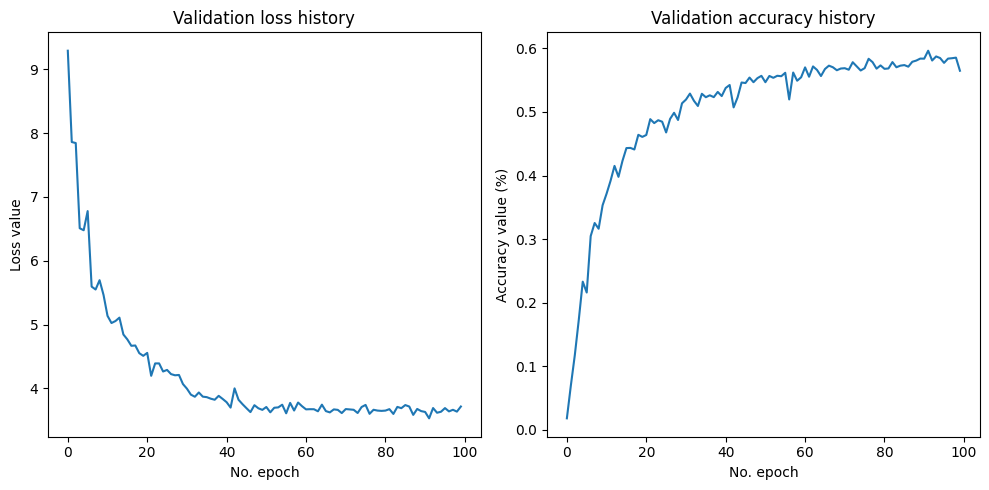

In [5]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early Stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights = True)
logdir = os.path.join("C:/Users/Owner/OneDrive - Miami Dade College/Desktop/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) # log directory will be created
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# Training the model
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: %.2f' % score[0])
print('Test accuracy: %.2f'% score[1])

# Plotting validation and loss curves
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')

plt.tight_layout()
plt.show()





In [6]:
# Saving the model
model.save("C:/Users/Owner/OneDrive - Miami Dade College/Desktop/Save model")

Data Visualization

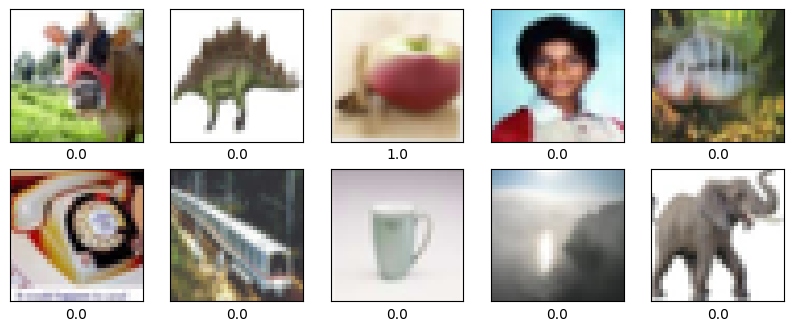

In [7]:
plt.figure(figsize=[10, 10])
for i in range (10):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i][0])

plt.show()

Making Predictions

313/313 [==============================] - 1s 3ms/step
[[4.4958277e-05 8.0613590e-06 3.9330026e-04 ... 1.3402198e-04
  2.1663123e-04 1.4157825e-04]
 [4.1823205e-06 4.7532080e-06 7.4048054e-05 ... 2.8829477e-03
  3.1244643e-05 1.9256213e-06]
 [1.2444682e-06 6.3191750e-05 2.2357905e-05 ... 3.3125730e-04
  6.4965698e-06 1.8178817e-04]
 ...
 [1.6975973e-05 1.2305216e-04 8.7937760e-06 ... 3.6636433e-05
  1.0772232e-07 3.8450169e-05]
 [2.1029127e-05 4.5220804e-05 6.3734835e-05 ... 1.9103492e-03
  1.0982219e-04 3.1006226e-02]
 [1.8996077e-03 1.3836927e-04 8.0223785e-05 ... 2.4700188e-07
  4.1113431e-06 1.0745765e-05]]
[68 33 30 ... 51 42 70]


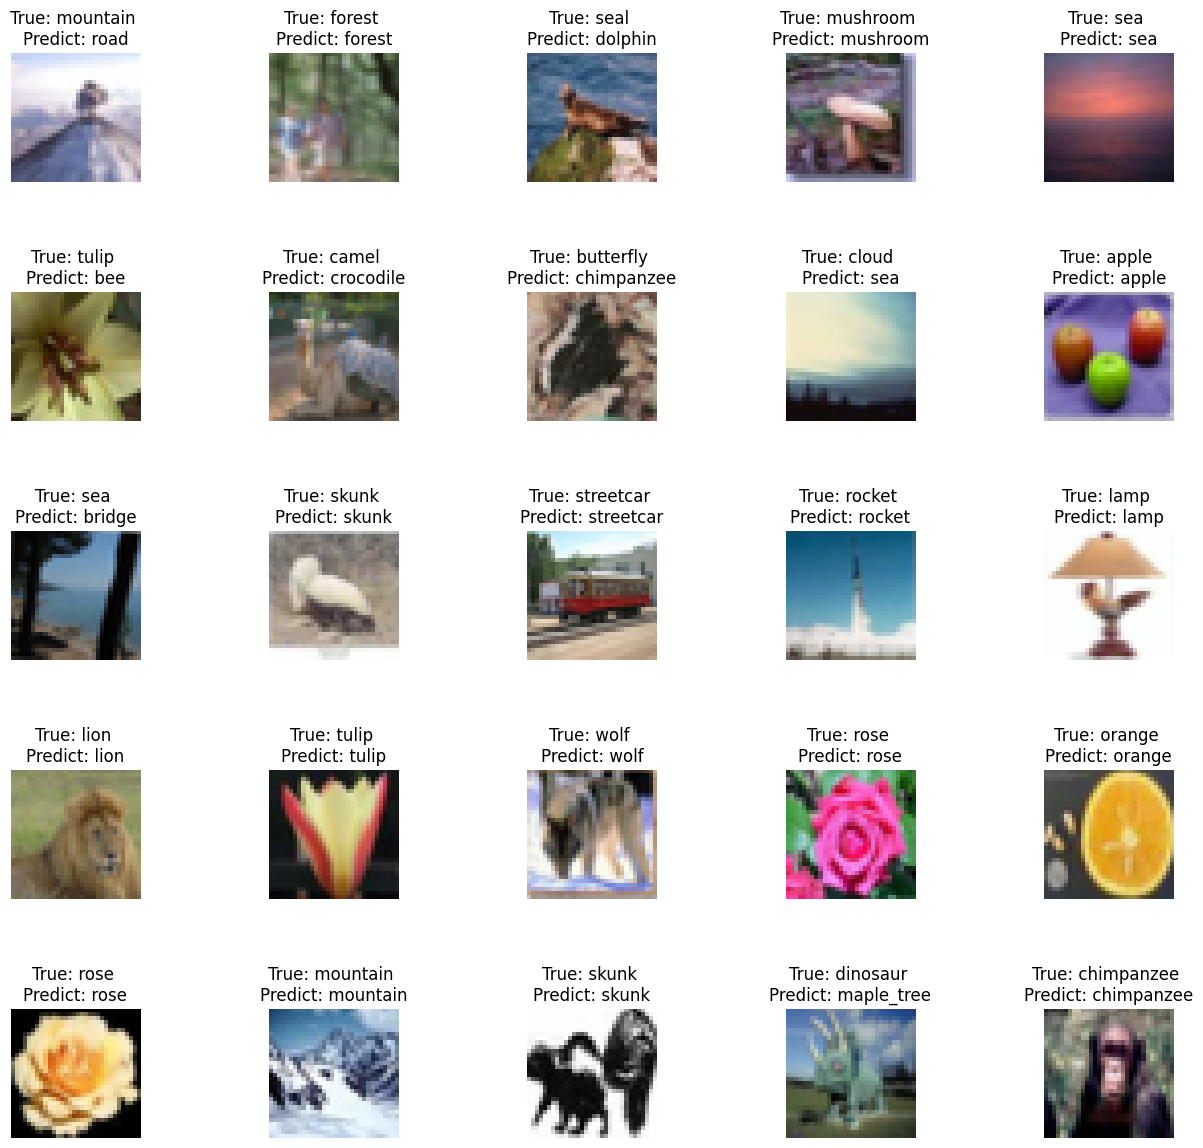

In [10]:
cifar100_classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]
# Making the Predictions
pred = model.predict(x_test)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (cifar100_classes[np.argmax(y_test[i])], cifar100_classes[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)